# Lab 9 | KNN Classification with Text Data & Census Data Analysis
For part 1 of this lab, you'll use a subset of the 20 Newsgroup dataset. The full dataset contains 20,000 newsgroup documents, partitioned evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning.

## Part 1 | KNN Classification on News Groups
For part 1 of this lab, you'll use a subset of the 20 Newsgroup dataset. The full dataset contains 20,000 newsgroup documents, partitioned evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning.

## Importing Libraries
Here, we import the necessary libaries that we need. For part 1, we import the following libraries:
- **Pandas:** a powerful open-source Python library specifically designed for data manipulation and analysis
- **Numpy:** a fundamental Python library used extensively in data science for performing efficient numerical computations on large datasets
- **Matplotlib:** a powerful data visualization library in Python, widely used in data science for creating static, animated, and interactive plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1 | Loading the Datasets
Load the matrixes of the training and test datasets, and performan statistical analysis on the data using graphs to analyze the distribution.
- [x] Loading the datasets, which include the train and test matrices, as well as the train and test labels
- [x] Show the top 20 terms, in decreasing order of total training frequency
- [x] Plot the distribution of the term frequencies in the training data

### Loading the Train & Test Matrices
Here, we load the test and train matrixes. As the data in the `.csv` files is separated by tabs, we set the delimiter to `\t`. We apply the same techniques to the test and train classes and convert them into dataframes using `.read_csv()` 

In [2]:
# loading the train and test matrices
train_matrix_df = pd.read_csv('newsgroups/trainMatrixModified.txt', delimiter='\t', header=None)
test_matrix_df = pd.read_csv('newsgroups/testMatrixModified.txt', delimiter='\t', header=None)

# loading the train and test label
train_classes_df = pd.read_csv('newsgroups/trainClasses.txt', delimiter='\t', header=None)
test_classes_df = pd.read_csv('newsgroups/testClasses.txt', delimiter='\t', header=None)

### Finding the Top 20 Terms in Descending Order
We now find the top 20 terms of the total training frequency in a descending order. We use `.sort_values()` and set the parameter `ascending` in it to `false`. We find the top 20 by using `.head(20)`.

In [3]:
# the top 20 terms in decreasing order of total training frequency
training_frequencies = train_matrix_df.sum(axis=1)
top_20_terms = training_frequencies.sort_values(ascending=False).head(20)
top_20_terms

3       959.0
225     720.0
136     680.0
1682    578.0
115     545.0
30      483.0
107     470.0
84      429.0
192     401.0
82      378.0
690     370.0
25      329.0
45      326.0
36      325.0
451     323.0
187     319.0
9       318.0
640     311.0
184     302.0
106     300.0
dtype: float64

### Histogram Plotting
Lastly, we plot the histogram of the term frequencies in the training data. We set a title using `.title()`, the label of the x-axis using `.xlabel()`, the label of the y-axis using `ylabel()` and show the end result of the histogram using `.show()`.

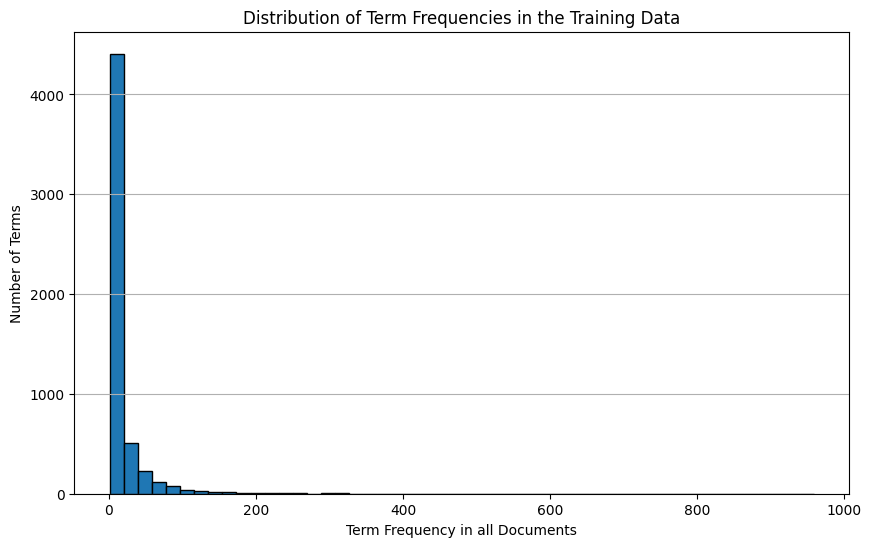

In [4]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(training_frequencies, bins=50, edgecolor='black')
plt.title('Distribution of Term Frequencies in the Training Data')
plt.xlabel('Term Frequency in all Documents')
plt.ylabel('Number of Terms')
plt.grid(axis='y')
plt.show()

## Step 2 | Creating a KNN Classifier Function
Create your own KNN Classifier function that allows for inputs and should return the predicted class. Ensure it works with two types of distances and show that it works.
- [x] The classifier should allow the inputs as training data matrix, training labels, instance to be classified and the value of K.
- [x] The classifier should return the predicted class for the instance and the indices of the top K neighbors
- [x] The classifier should work with euclidean distance & cosine distance, and can be done using two separate classifiers or as a parameter
- [x] Show that the classifier works by running the first two instances in the test data using both euclidean & cosine distance in each case 

### The Euclidean Distance
Now, we can calculate the euclidean distance by taking two vectors as parameters. We take the squared sum of the teo vectors by squaring each of them separately and then adding them up together. We then take the squared root of the squared sum and then return it.

$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

In [5]:
# function for euclidean distance
def euclidean_distance(vector_one, vector_two):
    squared_sum = np.sum((vector_one - vector_two) ** 2)
    square_root = np.sqrt(squared_sum)
    return square_root

### The Cosine Distance
Next, we calculate the cosine distance by taking two vectors as parameters. We do this by taking the dot product of the two vectors, and then calculate the magntidue of each of the vectors using `np.linalg.norm()`. Sometimes, there's a chance that the magnitude can be zero, so to handle the zero errors we return a 1 instead. Lastly, the cosine distance is calculated by subtracting 1 from the division of dot product by the product of the magnitudes.

$$d(\mathbf{x}, \mathbf{y}) = 1 - \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}$$

In [6]:
# function for cosine distance
def cosine_distance(vector_one, vector_two):
    dot_product = np.dot(vector_one, vector_two)
    normal_one = np.linalg.norm(vector_one)
    normal_two = np.linalg.norm(vector_two)
    if normal_one == 0 or normal_two == 0:
        return 1
    cosine_distance = 1 - (dot_product / (normal_one * normal_two))
    return cosine_distance

### The Cosine Similarity
We start by creating a function that is meant for calculating the cosine similarity. We create this function by taking in two parameters, which are two vectors. We calculate the product of the two vectors and the magnitude of each vector. If the mangitudes of either is 0, we return 0, else, we use the formula below to calculate the cosine similarity.
$$
\text{Cosine Similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}
$$



In [7]:
# function for cosine distance
def cosine_similarity(vector_one, vector_two):
    dot_product = np.dot(vector_one, vector_two)
    normal_one = np.linalg.norm(vector_one)
    normal_two = np.linalg.norm(vector_two)
    if normal_one == 0 or normal_two == 0:
        return 1
    cosine_similarity = (dot_product / (normal_one * normal_two))
    return cosine_similarity

### The KNN Classifier
Next, we create the KNN classifier. To start off, we pass in the parameters that take in the training data matrix, training labels, the value of nearest neighbors, and the type of metric we want to use.

The function works by converting the matrix and the labels into numpy arrays. We then perform the elucidean or cosine distance, and then find the top k indices and the labels. Lastly, we predict the class using `np.argmax()` and then return the predicted class and the top k indices.

In [8]:
# function for the knn classifier
def knn_classifier(matrix, labels, instance, k, metric="euclidean"):

    # convert the matrix and labels into numpy arrays if they're pandas dataframes
    if isinstance(matrix, pd.DataFrame):
        matrix = matrix.to_numpy()
    if isinstance(labels, pd.DataFrame):
        labels = labels.to_numpy().flatten()  
    
    # calculating the distances based on the metric parameter provided
    if metric == "euclidean":
        distances = np.linalg.norm(matrix - instance, axis=1)
    elif metric == "cosine":  
        distances = np.array([1 - cosine_similarity(instance, matrix[i]) for i in range(matrix.shape[0])])
    elif metric == "cosine_similarity": 
        distances = np.array([1 - cosine_similarity(instance, matrix[i]) for i in range(matrix.shape[0])])
    else:
        raise ValueError("Unsupported metric. Please use 'euclidean', 'cosine', or 'cosine_similarity'.")

    # retrieving indices of the smallest k values
    top_k_indices = np.argsort(distances)[:k]

    # retreiving labels of the top k nearest neighbors
    top_k_labels = labels[top_k_indices]
    
    # returns the most frequent label
    unique_labels, counts = np.unique(top_k_labels, return_counts=True)
    predicted_class = unique_labels[np.argmax(counts)]

    # returning the predicted class and the distances
    return predicted_class, distances[top_k_indices]

### Data Preprocessing
Before we run the KNN classifier function, we perform some data preprocessing first. As the shapes of the dataframes are different, we go about this by selecting the first 800 samples and the first 200 features from the train matrix dataframe. We also select the first 800 labels from the training labels. 

Next, we take two instances of the test matrix. We use the first row and second row of the dataframe and selecting the first 200 features. Next, we do this with the labels where we select the entire first and second rows. We convert the two instances and the labels into numpy arrays.

In [9]:
# selecting the first 800 samples and the first 200 features
train_matrix_aligned = train_matrix_df.iloc[:800, :200]

# selecting the first 800 labels
train_labels_aligned = train_classes_df.iloc[:800]

# selecting the two instances
test_instance_1 = test_matrix_df.iloc[0, :200].to_numpy()
test_instance_2 = test_matrix_df.iloc[1, :200].to_numpy()  

# selecting true labels 
true_label_1 = test_classes_df.iloc[0].to_numpy()
true_label_2 = test_classes_df.iloc[1].to_numpy()

### Testing the KNN Classifier
Now, we test the KNN classifier by inserting the parameters into the function. We test both the euclidean and cosine distances, where we set the k value to 3 in both, and pass in the newly adjusted training matrix and training labels.

In [10]:
# Running the KNN classifier for the first two instances using euclidean distance
predicted_class_euclidean_1, _ = knn_classifier(train_matrix_aligned, train_labels_aligned, test_instance_1, k=3, metric="euclidean")
predicted_class_euclidean_2, _ = knn_classifier(train_matrix_aligned, train_labels_aligned, test_instance_2, k=3, metric="euclidean")

# Running the KNN classifier for the first two instances using cosine distance
predicted_class_cosine_1, _ = knn_classifier(train_matrix_aligned, train_classes_df, test_instance_1, k=3, metric="cosine")
predicted_class_cosine_2, _ = knn_classifier(train_matrix_aligned, train_classes_df, test_instance_2, k=3, metric="cosine")

# printing out the instances results
print("Test Instance 1:")
print(f"True Label: {true_label_1}, Predicted (Euclidean): {predicted_class_euclidean_1}, Predicted (Cosine): {predicted_class_cosine_1}")
print("\nTest Instance 2:")
print(f"True Label: {true_label_2}, Predicted (Euclidean): {predicted_class_euclidean_2}, Predicted (Cosine): {predicted_class_cosine_2}")

Test Instance 1:
True Label: [0 1], Predicted (Euclidean): 0, Predicted (Cosine): 0

Test Instance 2:
True Label: [1 0], Predicted (Euclidean): 0, Predicted (Cosine): 0


## Step 3 & 4 | The Evaluation Function & Running It
Now, we create a evaluation function to measure the accuracy of the classifier. Here is the following things it'll do:
- [x] The function will call the classifier function in question 1 on all the test instances and in each case compare the actual test class label to the predicted class label
- [x] The evaluation function should take as input the training data, training labels, test instances, labels for test instances, and the value of K
- [x] The evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) 

### Creating the Evaulation Function
Here, we create a function that is design the evaluate the KNN classifier function on all of the test instances. The purpose of this function is to evaluate the classification accuracy. We design the function take the parameters of training data, training labels, test instances, labels for test instances, as well as the value of K.

In [11]:
# evaluting the knn classifier for its accuracy
def evaluate_knn_classifier(train_matrix, train_labels, test_matrix, test_labels, k, metric):
    # counter for correct predictions
    correct = 0

    # initializing a for loop
    for i in range(len(test_matrix)):
        # checking if the input is a pandas dataframe or numpy array
        if isinstance(test_matrix, pd.DataFrame):
            test_instance = test_matrix.iloc[i, :].to_numpy()
        else:
            test_instance = test_matrix[i, :]
        
        # extracting the true label as a scalar
        true_label = test_labels.iloc[i] if isinstance(test_labels, pd.DataFrame) else test_labels[i]
        
        # converting it to scalar
        if isinstance(true_label, pd.Series):
            true_label = true_label.values[0]  
        elif isinstance(true_label, np.ndarray):
            true_label = true_label[0]  
        
        # retrieving the predicted class using the classifier
        predicted_class, _ = knn_classifier(train_matrix, train_labels, test_instance, k, metric)

        # converting the predicted class to a scalar if scalar is a pandas series
        if isinstance(predicted_class, pd.Series):
            predicted_class = predicted_class.item()  

        # comparing the predicted class with the true class label
        if predicted_class == true_label:
            correct += 1
    
    # calculating the accuracy
    accuracy = correct / len(test_matrix)
    return accuracy

Once we're done creating the evaluation function, we will need to run. Here are the followings thing that will be done:
- [x] Run the evaluation function on a range of values for K from 5 to 100 (increments of 5) to compare the accuracy values for values of K
- [x] Run the evaluation function using both euclidean distance and the cosine similarity measure
- [x] Show the results as a graph with K as the x-axis and the evaluation metric (accuracy) on the y-axis
- [x] Use a single plot to compare the two versions of the classifier 

### K Values & Accuracy Lists
Now, we we create a list of k values that we want to run, ranging from 5 to 100 and is incremented in steps of 5. We initialize lists for storing the accuracy of different distances that we use, such as the euclidean and the cosine accuracy.

In [12]:
# range of k values
k_values = list(range(5, 101, 5))

# lists for storing accuracy
euclidean_accuracy = []
cosine_accuracy = []

### Running the Evaluation Function
Next, we use a for loop to run through the values of k. We use `.iloc()` to select the first 800 samples and the first 200 features from the train matrix, and the first 200 samples and the first 200 samples from the test matrix. We then store the results of the evaluation function into the lists.

In [13]:
# running the evaluation function
for k in k_values:
    train_matrix_aligned = train_matrix_df.iloc[:800, :200]
    test_matrix_aligned = test_matrix_df.iloc[:200, :200]   

    # calculating the accuracy values of the euclidean distance and cosine similarity
    euclidean_k = evaluate_knn_classifier(train_matrix_aligned, train_classes_df, test_matrix_aligned, test_classes_df, k, metric="euclidean")
    cosine_k = evaluate_knn_classifier(train_matrix_aligned, train_classes_df, test_matrix_aligned, test_classes_df, k, metric="cosine_similarity")

    # adding the accuracies of both metrics to their lists
    euclidean_accuracy.append(euclidean_k)
    cosine_accuracy.append(cosine_k)

### Plotting the Accuracies
Lastly, we plot the accuracies that have been calculated by the evaluation function. We plot both the accuracy from the euclidean distance as well as the cosine distance.

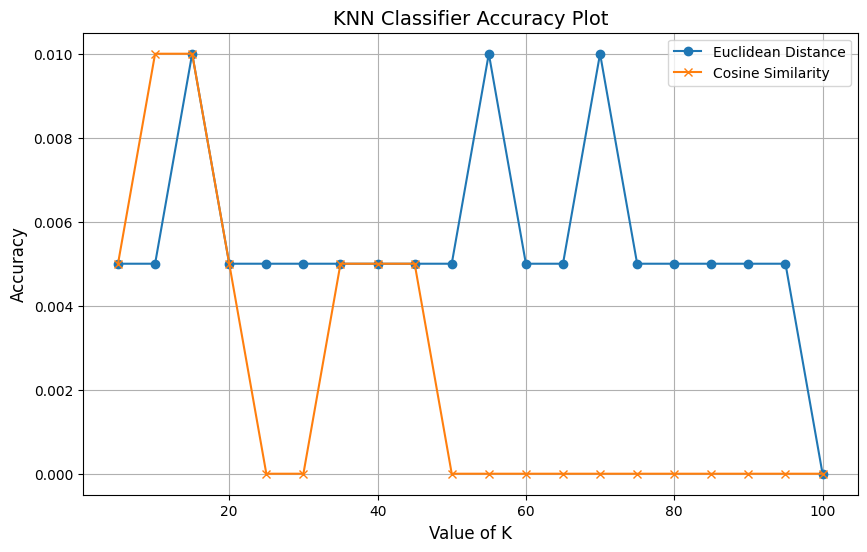

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot for Euclidean distance
plt.plot(k_values, euclidean_accuracy, label="Euclidean Distance", marker='o')

# Plot for Cosine distance
plt.plot(k_values, cosine_accuracy, label="Cosine Similarity", marker='x')

# Adding titles and labels
plt.title('KNN Classifier Accuracy Plot', fontsize=14)
plt.xlabel('Value of K', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Step 5 | Modification of the Training & Test Sets
Now, we use training and test sets and perform the same evaluation, however, this time we perform the evaluation using training & test sets. Here are the following things that are now done in this step:
- [x] Modify the training and test data sets so that the term weights are converted to TFxIDF weights (instead of raw term frequencies)
- [x] Rerun the evaluation for the cosine similarity on a range of K values and create a chart comparing the results with & without TF x IDF weights

### Calculating IDF
We calculate the inverse document freqeuncy (IDF) by extracting the total number of documents and count how many documents contain each term. We then apply the formula for calculating the IDF below:
$$
IDF(t) = \log\left(\frac{N}{1 + \text{df}(t)}\right) + 1
$$

In [15]:
# function for calculating the inverse document frequency
def calculate_idf(doc_matrix):
    n_documents = doc_matrix.shape[0]
    term_occurrences = np.sum(doc_matrix > 0, axis=0)
    idf = np.log(n_documents / (1 + term_occurrences)) + 1
    return idf

### Calculating TF-IDF
We now calculate the term-frequency inverse document frequency for the set of documents. We do this by taking the document term matrix where each element represents the term frequency of a term in the document. We calculate each term's importance in the document by finding the product of the term frequency and the inverse document frequency.

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

In [16]:
# function for calculating the tf-idf
def calculate_tfidf(doc_matrix, idf):
    tfidf_matrix = doc_matrix * idf
    return tfidf_matrix

### Trimming Matrices
We use this function to trim the matrices to match the length of a given set of labels. We take in the matrix and the labels as parameters, and then slice the matrix from 0 to the number of rows of labels.

In [17]:
# function for trimming
def trim_matrix_to_classes(matrix, labels):
    return matrix[:len(labels)]

### Converting Train & Test Matrices to TF-IDF
Once we have the functions defined, we then move on to taking the matrix of the train and test data and converting them into numpy arrays. We use the numpy arrays to calculare the inverse document frequency (idf) and the term-frequency inverse-document-frequency (tf-idf)

In [18]:
# converting train and test matrices to TF-IDF and trim to match the number of labels
idf_train = calculate_idf(train_matrix_df.to_numpy())
train_matrix_tfidf = calculate_tfidf(train_matrix_df.to_numpy(), idf_train)

idf_test = calculate_idf(test_matrix_df.to_numpy())
test_matrix_tfidf = calculate_tfidf(test_matrix_df.to_numpy(), idf_test)

### Trimming the Train & Test Matrices to Match the Labels
Next, we trim the matrces of the idf and tf-idf matrices of the train and test matrices to ensure that they match the number of labels. We also take the original matrices of the training and test data to ensure they match the number of labels too.

In [19]:
# trimming the matrices to match the number of labels
train_matrix_tfidf = trim_matrix_to_classes(train_matrix_tfidf, train_classes_df)
test_matrix_tfidf = trim_matrix_to_classes(test_matrix_tfidf, test_classes_df)

# trimming the raw matrics to match the number of labels
train_matrix_df_raw_trimmed = trim_matrix_to_classes(train_matrix_df.to_numpy(), train_classes_df)
test_matrix_df_raw_trimmed = trim_matrix_to_classes(test_matrix_df.to_numpy(), test_classes_df)

# trimming train and test matrices to the same number of features
train_matrix_df_raw_trimmed = train_matrix_df_raw_trimmed[:, :test_matrix_df_raw_trimmed.shape[1]]
train_matrix_tfidf = train_matrix_tfidf[:, :test_matrix_tfidf.shape[1]]

### Using K Values & Storing Accuracies
Next up, we have a list of k values and a number of lists to store the accuracy values of the cosine similarity for raw and tf-idf matrices

In [20]:
# the range of k values for testing
k_values = [1, 3, 5, 7, 9]

# List to store accuracies
cosine_accuracy_raw = []
cosine_accuracy_tfidf = []

### Calculating the Accuracy Values
Use a for loop to loop through the different values of k. We call the evaluate knn function where we pass in the trimmed original matrix, the original training dataframe, the trimmed test matrix, and labels dataframe, value of k and the metric respectively. This is for both the raw data and the tf-idf.

In [21]:
# calculating raw cosine similarity accuracies
for k in k_values:
    accuracy_k_raw = evaluate_knn_classifier(train_matrix_df_raw_trimmed, train_classes_df, 
                                             test_matrix_df_raw_trimmed, test_classes_df, k, metric="cosine")
    cosine_accuracy_raw.append(accuracy_k_raw)

# calculating tf-idf term accuracies
for k in k_values:
    accuracy_k_tfidf = evaluate_knn_classifier(train_matrix_tfidf, train_classes_df, 
                                               test_matrix_tfidf, test_classes_df, k, metric="cosine")
    cosine_accuracy_tfidf.append(accuracy_k_tfidf)

### Creating a Chart
Lastly, we want to compare the results of the accuracies of when we're having original data versus when we apply the tf-idf weights. The plotting is done in the cell below.

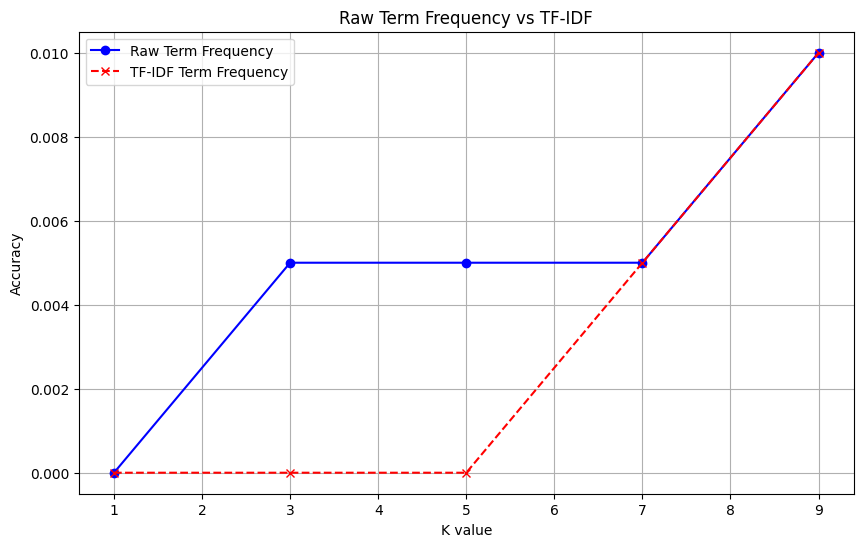

In [22]:
# comparing results with and without TF-IDF weights
plt.figure(figsize=(10, 6))
plt.plot(k_values, cosine_accuracy_raw, label="Raw Term Frequency", marker='o', linestyle='-', color='blue')
plt.plot(k_values, cosine_accuracy_tfidf, label="TF-IDF Term Frequency", marker='x', linestyle='--', color='red')

plt.title("Raw Term Frequency vs TF-IDF")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Step 6 | The Rocchio Method
For this step, we create a new classifier based on the Rocchio Method. It is a simple text clasisfication technique that represents each class by the average (centroid) of its feature vectors. Here are the following steps as to how it works:
1. For each document in a class, its feature vector is calculated, and the centroid is the average of these vectors
2. When a new document needs to classified, the algorithm compares it feature vector to the centroids of all classes.
3. The new document is assigned to the class with the closes centroid, using a distance metric such as euclidean of cosine similarity

Here are the following things to do for this step:
- [x] Create a new classifier adapted for text categorization. Separate the training function from the classification function
- [x] The training function takes the inputs the prototypes returned from the training function and the instance to be classified
- [x] The training function should measure the cosine similarity of the test instance to each prototype vector
- [x] The output should indicate the predicted class for test instance and similarity values of the instance to each category prototypes
- [x] The evaluation function should be used to compare your results to the best KNN results

### Converting Labels & Trimming Matrices
Here, we convert the labels into a 1D array of integer class labels. This is both for the train and test labels. Next, we perform trimming of the tf-odf matrices to ensure it perfectly aligns with the labels, as this prevents mismatches.

In [23]:
# converting labels into a 1D array
train_labels = np.argmax(train_classes_df.values, axis=1)
test_labels = np.argmax(test_classes_df.values, axis=1)

# Trim matrices to ensure alignment with the labels
train_matrix_trimmed = train_matrix_tfidf[:len(train_labels), :]
test_matrix_trimmed = test_matrix_tfidf[:len(test_labels), :]

### The Classifier Function
We create a classifier function that take in two parameters, which would be the training matrix and the training labels. We find the unique labels and initialize a prototype dictionary. Next, we use a for loop where we loop through the unique labels and for each loop we extract the rows, compute the mean vectors of the rows (giving us the prototype) and then we store this in the dictionary.

In [24]:
# creating a method that returns the prototype dictionary
def rochio_classifier(train_matrix, train_labels):
    # finding the unique training labels
    unique_labels = np.unique(train_labels)

    #initialization of the dicaiotnry
    prototypes = {}

    # looping through the unique labels
    for label in unique_labels:

        # computing the mean vectors and adding them to the dictionary
        class_matrix = train_matrix[train_labels == label]
        prototype = np.mean(class_matrix, axis=0)
        prototypes[label] = prototype

    return prototypes

### Rochio Classification
Next, we create a new function that takes the prototypes and a single test instance. It calculates the similarity between the test instance and each class's prototype, assingning the instance to the class with the highes familiarity. Here are the steps:

1. The function takes in the arguments of the prototype dictionary and test_instance, which is a single feature vector
2. We keep tack of the highest similarity score and predicted class by initalizing the variables for them
3. We then loop through the prototypes by checking each label and its prototype. We then calculate the cosine similarity
4. If a higher similarity is found, the update the `max_similarity` and the `predicted_class` to the new value and class label 

In [25]:
# function for performing the classification step
def rochio_classify(prototypes, test_instance):

    # variables for highest similarity and predicted class
    max_similarity = -1
    predicted_class = None

    # for looping through the labels and prototypes
    for label, prototype in prototypes.items():
        
        # calculating the cosine similarity
        similarity = cosine_similarity(test_instance, prototype)

        # comparing to find the highest similarity
        if similarity > max_similarity:
            max_similarity = similarity
            predicted_class = label

    # returning the predicted class
    return predicted_class

### Evaluating Performance of the Rocchio Classifier
The function below is used to evlauate the performance of the Rocchio classifier using the test dataset by calculating the accuracy. We calculate the accuracy by finding the number of correctly classified instances out of the total test instances. Here's how the function works:
1. The function takes in 4 parameters: the training matrix, the training labels, the testing matrix and the testing labels
2. We then train the Rocchio classifier function to compute prototpyes for each class using the training data
3. With a correction counter initialized, we loop through the test instances, where we get the test labels and perform rocchio classification
4. Once we retrieve the predicted class, we check if it is the same as the true label. If so, then we increment the correction counter by 1
5. We finally calculate the accuracy by dividing the number of correctly predicted labels by the total number of test instances

In [26]:
def evaluate_rocchio_classifier(train_matrix, train_labels, test_matrix, test_labels):
    
    # training the Rocchio classifier to get the prototypes for each class
    prototypes = rochio_classifier(train_matrix, train_labels)

    # initializing the correction counter
    correct = 0

    # looping through test instances and classifying them
    for i in range(len(test_matrix)):
        
        # retrieving the test instance
        test_instance = test_matrix[i, :]

        # retrieving the true label from the test instance
        true_label = test_labels.iloc[i] if isinstance(test_labels, pd.DataFrame) else test_labels[i]

        # classifying the test instance using the rochio classify
        predicted_class = rochio_classify(prototypes, test_instance)

        # checking if predicted class is the same as the true label
        if predicted_class == true_label:
            correct += 1

    # Calculate accuracy
    accuracy = correct / len(test_matrix)
    return accuracy

### Calculating the Accuracy
Lastly, we calculate the accuracy here by calling all the functions here, and then we have the final accuracy result printed out

In [27]:
rocchio_accuracy = evaluate_rocchio_classifier(train_matrix_trimmed, train_labels, test_matrix_trimmed, test_labels)
print(f"Rocchio Classifier Accuracy: {rocchio_accuracy}")

Rocchio Classifier Accuracy: 0.995


## Step 7 | Using Scikit-Learn to Perform Classification
Lastly, we perform classification of the test instances using Scikit-Learn's Nearest Centroid classifier using Scikit-learn's Nearest Centroid classifier. We then compare the classification accuracy of the Rocchio implementation to the classification results from Scikit-learn

In [28]:
# I give up!

## Part 2 | KNN Classification using Scikit-learn
For this second part, we use a simplified version of the Adult Census Data Set. In the subset provided, the attributes have been removed and preprocessing has been performed. We will now perform the following steps as shown below.

## Importing Libraries
- **Scikit-learn:**  is a free and open-source machine learning library for the Python programming language. It features various classification, regression and clustering algorithms. It provides simple and and efficient tools for predicitve data analysis

## Step 1 | Data Pre-Processing
We start off by performing data pre-processing on the `.csv` file. We perform the data pre-processing in the steps described below:
- [x] Load the data into a Pandas DataFrame. Start off by creating dummy variables for the categorical attributes so that the dataset is numeric
- [x] Separate the attribute `income_>50K` from the remaining attributes, which will be used as a target attribute for classification
- [x] Split the transformed data into training and test sets, using a 80%-20% randomized split.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data Preprocessing
Here, we perform all the data preprocessing. This is done in the following steps:
1. We load the `.csv` file into a pandas dataframe, and then create dummy variables for cateogrical data `get_dummies`
2. Next, we create the target variable by extracting the `income_>50K` column into a new dataframe, and creating a new dataframe by dropping all the features except the target attribute which is `income_>50K`
3. We then perform the data splitting by allocating 20% of the dataset towards the testing set and 80% towards the training set

In [30]:
# loading the data into a pandas dataframe
dummy_data = pd.read_csv("adult-modified.csv")  

# creating dummy variables for categorical data
dummy_data = pd.get_dummies(dummy_data, drop_first=True)

# creating the target attributes
X = dummy_data.drop("income_>50K", axis=1)
y = dummy_data["income_>50K"]

# splitting the data into a 80% and 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111) 

## Step 2 | Running the KNN Classifier
We will now run the KNN classifier. We do this in a number of steps:
- [x] Noramlize the data so that all attributes are in the same scale (between 0 to 1)
- [x] Run the KNN classifier using using K = 10 and generate the confusion mateix using Matplotlib as well as the classification report
- [x] Report the model accuracy for both training and testing sets

### Normalization, KNN & Prediction
Here, we perform the normlization process, where all the features are scaled between 1 and 0. We normalize both the testing and training data. Next, we initialize a KNN where the k nearest neighbors is set, and then we train the model based off on the input data and the target variable. Next, we perform predictions on both the training and testing datasets.

In [31]:
# normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using a KNN where we set the number of neights to 10
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)

# predicting on both training and test sets
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

### Generating a Confusion Matrix
After training the model, and performing the predictions, we create a confusion matrix using matplotlib. We set the classes to being `<=50K` and the `>50K` and set up the x and y labels of the plot, as well as the title.

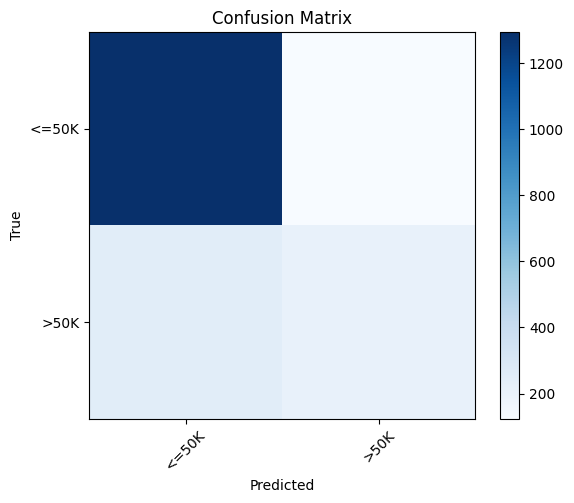

In [32]:
# generating a confusion matric
conf_matrix = confusion_matrix(y_test, y_test_pred)

# setting up the matplotlib figure
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# adding the required labels and ticks
classes = ['<=50K', '>50K']
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Classification Report
Lastly, we generate a classification report for the KNN model which displays the model accuracy of the KNN on both the training and testing datasets.

In [33]:
print("Classification Report for Test Set:\n", classification_report(y_test, y_test_pred))

# the model accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# print statements for the model 
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Classification Report for Test Set:
               precision    recall  f1-score   support

       False       0.84      0.91      0.87      1417
        True       0.63      0.46      0.53       466

    accuracy                           0.80      1883
   macro avg       0.74      0.69      0.70      1883
weighted avg       0.79      0.80      0.79      1883

Training Accuracy: 0.8435
Test Accuracy: 0.8008


## Step 3 | Using Uniform Weights
We now compare the accuracy of the KNN classifier with unifrom weights with different values of K on both the training and testing data. Here are the following things done below:
- [x] Show the results in a single figure with two line plots for the test and training accuracy value (y-axis) and values of k (x-axis)
- [x] What range of values of K represent overfitting? 

### Setting up the K Values & Accuracy Lists
We start off by setting up a list of values from 1 to 50 for the values of k that will be interated throughout the for loop. We then initialize the list of accuracies for the training and testing data

In [34]:
# range of values of k from 1 to 50
k_values = range(1,51)

# setting up a list of accuracies
training_accuracies = []
testing_accuracies = []

### Training the KNN Model and Calculating Accuracy
Next, we create a KNN classifier and train the model with uniform weights using `X_train_scaled` as the input data and `y_train` as the target variable. Once the model is trained using `fit()`, we perform predictions on the training and testing data and obtain the accuracies, which is added to the list of accuracies for training and testing data

In [35]:
for k in k_values:

    # creating a KNN classifier and training the model with uniform weight
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train_scaled, y_train)

    # performing predictions on the training and testing data
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # calculating the training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # appending the accuracies to the lists
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)
    

### Plotting the Graph
Next, we plot the grapb using matplotlib, where we set up the x and y labels and differentiate between the training and testing accuracies using blue and red, as well as different ploting shapes using `x` and `o`. It can be seen that the model is generalizing well between K = 20 to K = 50, as the accuracies are very close to each, however, it can be seen that between K = 0 to K = 10 that the model is overfitting due to the large difference in the accuracies.

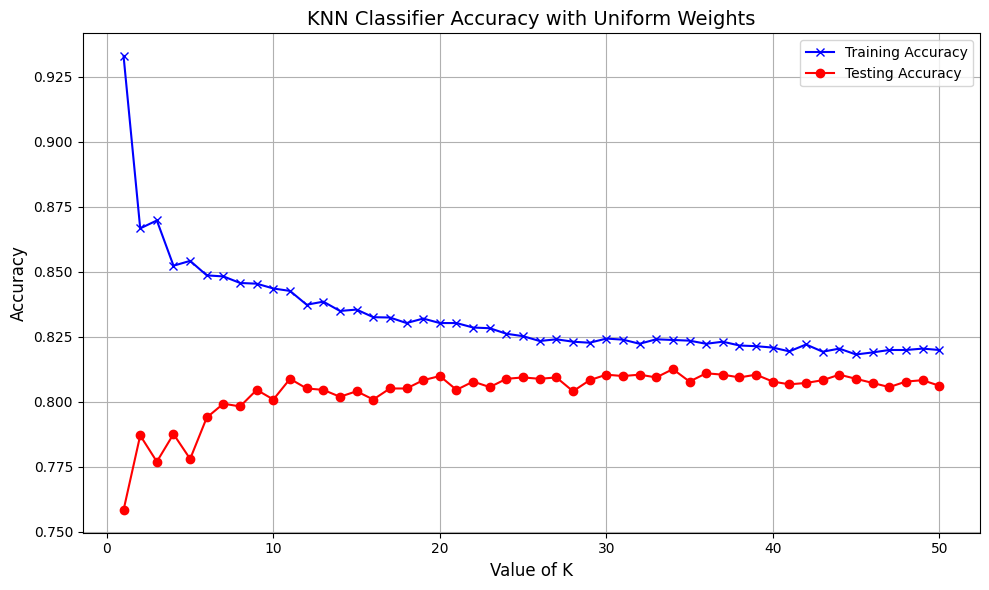

In [36]:
# plotting the accuracy daa
plt.figure(figsize=(10, 6))
plt.plot(k_values, training_accuracies, label='Training Accuracy', color='blue', marker='x')
plt.plot(k_values, testing_accuracies, label='Testing Accuracy', color='red', marker='o')

# adding the labels and titles to the plots
plt.title('KNN Classifier Accuracy with Uniform Weights', fontsize=14)
plt.xlabel('Value of K', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# showing the plot itself
plt.show()

### Finding the Best K Value
After the graph plotting has been performed, we then find the k value which gives us the highest testing accuracy, which would be when K = 34

In [37]:
# printing out the best k value which gives the highest testing accuracy
best_k = k_values[testing_accuracies.index(max(testing_accuracies))]
print(f"The best value of K (highest test accuracy) is: K = {best_k}")

The best value of K (highest test accuracy) is: K = 34


## Step 4 | Decision Trees & Classification
Using non-normalized training and testing data, perform the classification using scikit-learn's tree classifier using the default parameters. Next, perform the following:
- [x] Generating the confusion matrix, classification report, and average accuracy scores of the classifier
- [x] Compare the average accuracy score on the test and training data sets
- [x] What does the comparison tell you in terms of bias-variance trade-off  

### Training with the Decision Tree Classifier 
We intiialize the decision tree classifier and train the model with non-normalized data. Next, we make predictions using the decision tree classifier on the training and test data, and calculating the accuracy of the training and testing data.

In [38]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=111)

# Train the model with the non-normalized data
clf.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

### Confusion & Classification Report
We generate a confusion matrix and a classification report and have them both printed out for further analysis. By looking at the testing and training accuracy, we can see that the model achieves a high training accuracy, which means that the trianing data fits well. However, a lower test accuracy means that the model doesn't perform well on unseen data. As a result, this means that the model is overfitting, which causes high variance.

In [39]:
# Generate confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)

# Generate classification report for test data
report = classification_report(y_test, y_test_pred)

# Print the accuracy and classification report
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report (Test Data):")
print(report)

Training Accuracy: 0.9432859609509895
Test Accuracy: 0.7477429633563463
Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.82      0.85      0.83      1417
        True       0.49      0.45      0.47       466

    accuracy                           0.75      1883
   macro avg       0.66      0.65      0.65      1883
weighted avg       0.74      0.75      0.74      1883



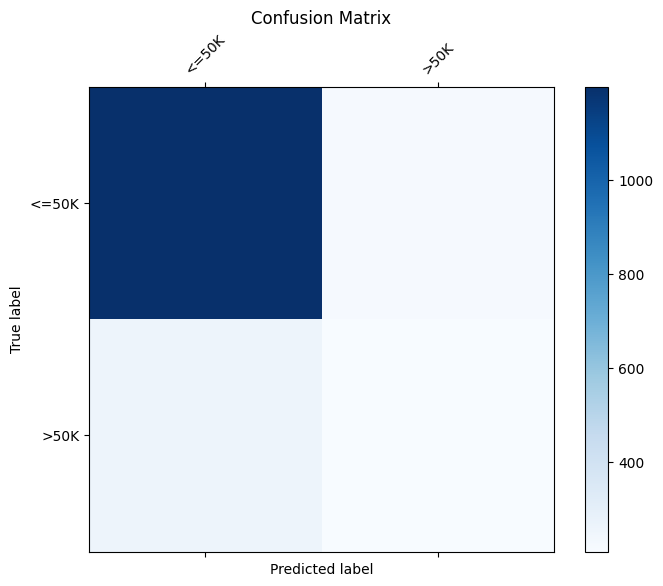

In [40]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap='Blues', fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=45)
plt.yticks([0, 1], ['<=50K', '>50K'])
plt.show()